# Veränderung der Muttersterblichkeitsrate

Gruppe: Jovana Pavlovic, Sarah Matera, Jelena Radic

Fragen
- Wie hat sich die maternale Sterblichkeit von 1985 bis 2020 verändert? Wir beziehen uns dabei auf die 10 Ländern, mit den meisten Todesfällen. 
- Was sind die Gründe dafür?

Quellen
- https://ourworldindata.org/grapher/number-of-maternal-deaths-by-region?time=earliest..2023


## 1. Daten beschaffen und laden

In [6]:
import pandas as pd
df = pd.read_csv('number-of-maternal-deaths-by-region.csv', skiprows=1, names=['Gebiet','Code','Jahr','Todesfälle',"Anotation"])
df_pivot = df.pivot(index='Jahr', columns='Gebiet', values='Todesfälle').sort_index(ascending=False)
df_pivot.head()

Gebiet,Afghanistan,Africa,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,Australia,...,Upper-middle-income countries,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,World,Yemen,Zambia,Zimbabwe
Jahr,,,,,,,,,,,,,,,,,,,,,
2020,8698.113,207742.58,2.482934,757.5242,2913.6323,0.212479,285.56448,9.516402,67967.93,8.706868,...,21973.732,6.523427,251.08507,8.499853,1207.80880,677.48676,286062.78,1852.3372,891.48510,1733.8484
2019,8878.076,211770.30,1.591507,763.3077,2923.5007,0.189132,215.50322,9.227061,74456.85,15.510796,...,20669.660,7.426150,239.60716,8.349955,877.33840,756.54650,295773.70,1818.7615,840.03720,1906.9050
2018,8996.077,213123.27,1.628788,802.8612,2930.0200,0.188674,228.78816,9.538530,76753.18,14.157607,...,22106.713,7.225577,239.54066,8.692412,975.56464,769.49000,299547.80,1747.5267,931.52150,1735.1570
2017,9081.677,213705.03,2.073806,908.3727,3112.0278,0.211225,273.06076,9.750261,79920.16,14.886902,...,23927.291,7.053134,216.58507,8.486219,1001.65393,779.87380,303369.56,1764.1555,986.36160,1762.2927
2016,9867.574,214324.38,2.196508,904.2167,3251.3743,0.212515,295.90686,10.026829,83722.70,15.993327,...,24358.018,8.152824,220.16113,8.480613,878.43750,786.22240,307844.40,1678.7983,969.42957,1918.8360


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge.

In [15]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr' , values='Todesfälle')
df_pivot.head()

Jahr,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,10258.534000,8671.92100,8488.960000,7522.121600,7549.705000,7812.458500,7743.889000,8404.729500,9554.33700,10849.466000,...,10233.407000,10143.417000,10242.153000,10013.264000,10208.116000,9867.574000,9081.677000,8996.077000,8878.076000,8698.113000
Africa,222858.480000,221952.14000,233024.190000,231802.620000,225753.340000,227292.120000,228749.750000,239266.810000,240080.67000,234074.690000,...,221603.270000,218967.640000,218840.140000,218810.920000,215300.660000,214324.380000,213705.030000,213123.270000,211770.300000,207742.580000
Albania,40.066902,35.25017,32.930653,30.484293,28.652466,26.628704,22.968624,21.309374,19.88659,17.938005,...,2.815829,2.728846,2.597531,2.453451,2.338617,2.196508,2.073806,1.628788,1.591507,2.482934
Algeria,2187.816200,2024.16060,1966.334100,1822.979900,1744.921300,1615.685300,1601.330400,1608.767300,1586.66430,1540.073000,...,957.606700,938.247740,905.703100,848.591900,895.783140,904.216700,908.372700,802.861200,763.307700,757.524200
Angola,5698.489000,5832.26000,5653.750500,5821.093800,6489.137700,6675.125000,6577.188500,7266.202600,7125.99270,7074.371000,...,3595.014200,3353.565700,3292.978000,3372.599400,3231.174800,3251.374300,3112.027800,2930.020000,2923.500700,2913.632300


## 3. Statistik der Roh-Daten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Gebiete* enthält 261 verschieden Gebiete
- Die Spalte *Codes* enthält 239 verschiedene Codes
- Es sind Daten zwischen 1543 and 2021 vorhanden. Ab dem Jahr 1950 sind die Daten komplett
- Die Lebenserwartung streut zwischen 12 und 86.5 Jahren

In [16]:
df.dtypes

Gebiet         object
Code           object
Jahr            int64
Todesfälle    float64
Anotation      object
dtype: object

### 3.1 Analyse Gebiete

In [17]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  196


In [18]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Afghanistan      36
New Zealand      36
Niger            36
Nigeria          36
North America    36
                 ..
Ghana            36
Greece           36
Grenada          36
Guatemala        36
Zimbabwe         36
Name: count, Length: 196, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

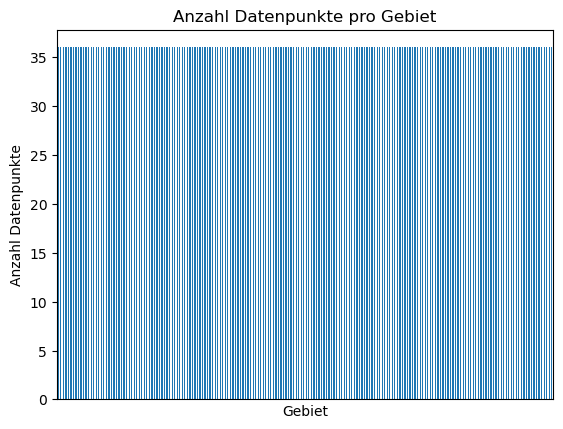

In [19]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [20]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  187


In [21]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
AFG    36
PAN    36
NIC    36
NER    36
NGA    36
       ..
GHA    36
GRC    36
GRD    36
GTM    36
ZWE    36
Name: count, Length: 186, dtype: int64

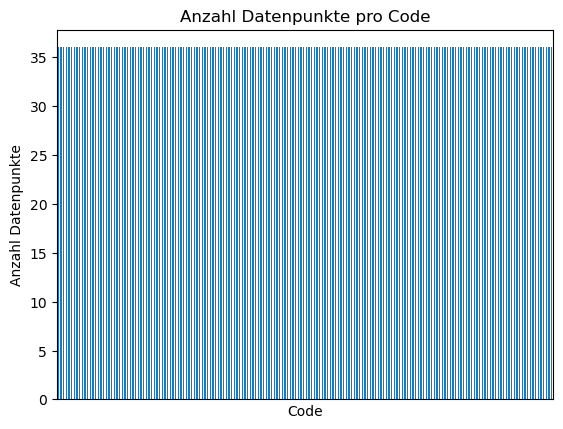

In [22]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [23]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  36


In [24]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1985    196
1986    196
1987    196
1988    196
1989    196
1990    196
1991    196
1992    196
1993    196
1994    196
1995    196
1996    196
1997    196
1998    196
1999    196
2000    196
2001    196
2002    196
2003    196
2004    196
2005    196
2006    196
2007    196
2008    196
2009    196
2010    196
2011    196
2012    196
2013    196
2014    196
2015    196
2016    196
2017    196
2018    196
2019    196
2020    196
Name: count, dtype: int64

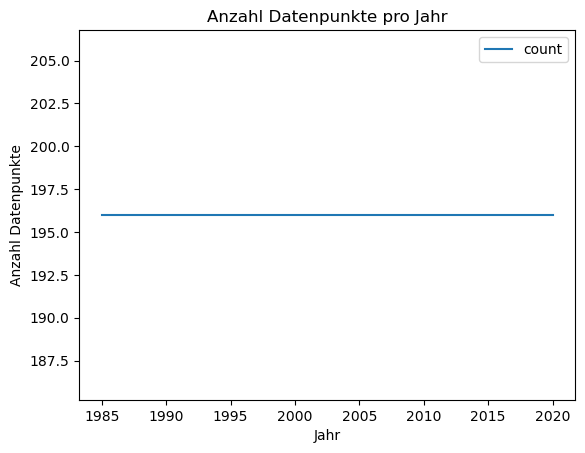

In [26]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.legend()  # Legende anzeigen

### 3.4 Analyse Todesfälle

In [27]:
df.describe()

,Jahr,Todesfälle
count,7056.000000,7056.000000
mean,2002.500000,8661.259038
std,10.389031,43439.411317
min,1985.000000,0.061462
25%,1993.750000,9.854105
50%,2002.500000,127.637903
75%,2011.250000,1690.109425
max,2020.000000,578245.900000


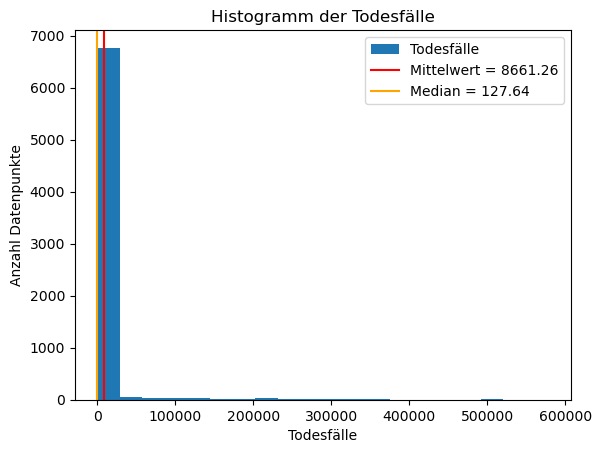

In [30]:
g = df['Todesfälle'].plot(kind='hist', bins=20, title='Histogramm der Todesfälle', 
                           xlabel='Todesfälle', ylabel='Anzahl Datenpunkte')
mean = df['Todesfälle'].mean()
g.axvline(x=df['Todesfälle'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Todesfälle'].median()
g.axvline(x=df['Todesfälle'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()




## 4. Analyse 

### Vorgehen

### Beobachtungen
- Afrikanische Länder sind an der Spitze in der Zunahme der Lebenserwartung. Eine Zunahme der Lebenserwartung von mehr als 5 Jahren haben: Uganda, Tanzania, Malawi, Zimbabwe, Lesotho, Swasiland
- Eine Reduktion der Lebenserwartung von mehr als 4 Jahren haben: Saint Vincent and the Grenadines, Mexiko, Kuba, Oman


### Interpretation

Corona führte bei allen Ländern zu einer Reduktion der Lebenserwartung (siehe Plot)

Länder (in Afrika) mit starker Zunahme der Lebensqualität:
- Bei den afrikanischen Ländern stieg die Lebenserwartung in den letzten Jahren sehr stark, da die Lebenserwartung sehr tief war. Zudem ist der Effekt von Corona auf die Lebenserwartung in den afrikanischen Ländern eher kleiner weil die Bevölkerung jünger ist
- Bei einigen afrikanischen Ländern hat sich die Lebenserwartung zwischen 1990 und 2000 stark verringert wegen HIV. Siehe Beispielsweise: https://life4me.plus/pl/news/life-expectancy-in-zimbabwe-shoots-up-hiv-infection-drop/


Länder mit einer starken Reduktion der Lebensqualität:
- Hier war die Lebenserwartung in den Jahren vor Corona konstant. Corona führte dann zu einer Reduktion der Lebenserwartung


### Berechnungen

In [32]:
diffs = df_pivot[1985]-df_pivot[2020]   # Differenz zwischen 2021 und 2011
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Gebiet
Nigeria                          -33287.6850
Democratic Republic of Congo      -4723.8990
Chad                              -4284.4947
Kenya                             -2419.8215
Cote d'Ivoire                     -1152.4020
                                    ...     
Upper-middle-income countries     59745.2130
India                            150910.9320
Lower-middle-income countries    192456.5500
Asia                             258760.1300
World                            292183.1200
Length: 196, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Todesfälle 2011-2021'}, ylabel='Gebiet'>

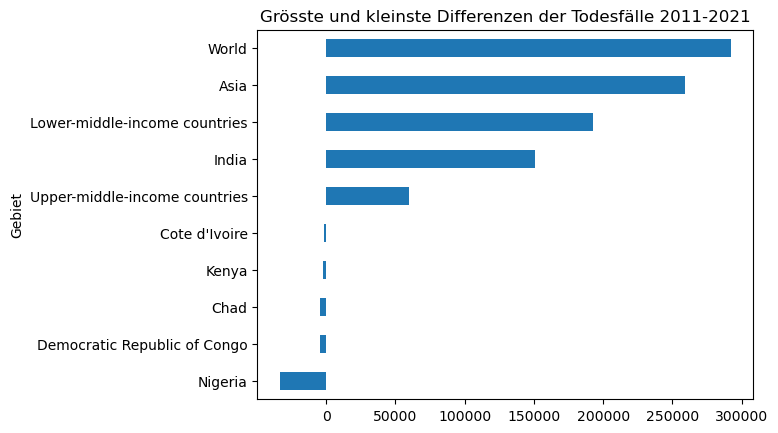

In [42]:
diff_sel = (diffs < -1152) | (diffs > 59745)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Todesfälle 2011-2021')

In [39]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Nigeria', 'Democratic Republic of Congo', 'Chad', 'Kenya', "Cote d'Ivoire", 'Upper-middle-income countries', 'India', 'Lower-middle-income countries', 'Asia', 'World']


### Visualisierung

In [41]:
color_dict = {
    'Saint Vincent and the Grenadines': 'blue',
    'Mexico': 'cyan',
    'Cuba': 'lightgreen',
    'Oman': 'green',
    'Tanzania': 'red',
    'Sierra Leone': 'orange',
    'Malawi': 'yellow',
    'Zimbabwe': 'brown',
    'Lesotho': 'pink',
    'Eswatini': 'purple'
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='Todesfälle', xlabel='Jahr', ylabel=f'Todesfälle', legend=True,
                                  label=f'{gebiet} - Diff. 2021-2011: {diff:.2f}', # für die Legende
                                  xlim=[1980,2025], ylim=[0,80],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots

# Covid Pandemie    
g.axvline(x=2020, color='black', linestyle='--') 
g.text(2020.5, 37, 'Covid')  

# HIV Pandemie
g.axvline(x=2005, color='black', linestyle='--')  
g.text(2005.5, 37, 'HIV');

KeyError: 'Nigeria'